# Descriptive statistics of [many] lines in an image
When studying intensity along many lines in an image, this can be done in parallel on a GPU. This notebook demonstrates this using just two lines for illustration purposes. It can be assumed that reading out hundreds or thousands of lines in parallel makes sense on GPUs performance-wise.

In [1]:
import pyclesperanto_prototype as cle
from skimage.data import cells3d
import numpy as np

To demonstrate a potential use-case, we take a close look at an image of cells expressing a membrane marker.

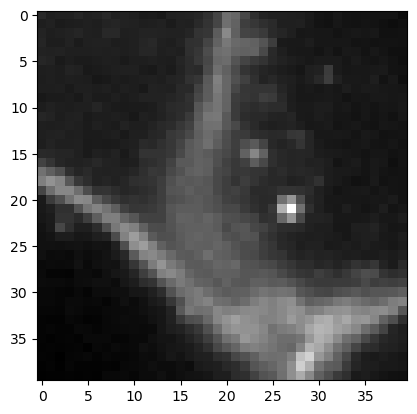

In [2]:
membranes = cells3d()[30, 0, 110:150, 110:150]
cle.imshow(membranes)

We define coordinates of four points which will be connected to two lines. The connection will be done using a _touch_ matrix which allows connecting n points with n points.

In [3]:
coords = np.asarray([
    [0, 17],  # line 1 start (x, y)
    [10, 24], # line 1 end
    [20, 21], # line 2
    [35, 21]
]).T

In [4]:
connection_matrix = cle.symmetric_maximum_matrix(np.asarray([
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0], # this connects the two points of line 1
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1], # this connects the two points of line 2
    [0, 0, 0, 0, 0]
]))
connection_matrix

cl.OCLArray([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]], dtype=float32)

First we visualize these lines on top of the membrane image.

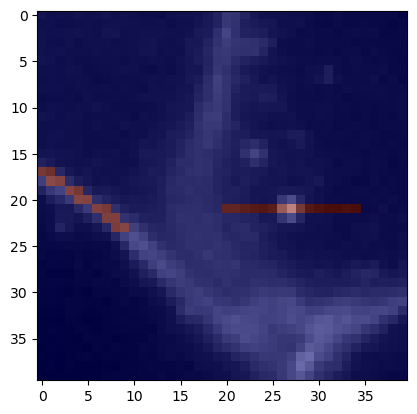

In [5]:
mesh = cle.create_like(membranes)
mesh = cle.touch_matrix_to_mesh(coords, connection_matrix, mesh)

cle.imshow(membranes, continue_drawing=True)
cle.imshow(mesh, alpha=0.5, colormap='jet')

## Measure the mean intensity along lines
Next we use the matrix configured above to measure the mean average intensity along the lines. We also need to specify how many samples will be taken along the lines.

In [6]:
num_samples = 10

mean_intensity_matrix = cle.generate_mean_intensity_between_points_matrix(
                                membranes, coords, connection_matrix, num_samples=num_samples)
mean_intensity_matrix

cl.OCLArray([[   0. ,    0. ,    0. ,    0. ,    0. ],
       [   0. ,    0. , 7317.8,    0. ,    0. ],
       [   0. , 7317.8,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. ,    0. , 4482.6],
       [   0. ,    0. ,    0. , 4482.6,    0. ]], dtype=float32)

We can visualize these measurements also again as lines. As we pass points and connections between points as matrix, this is technically a mesh.

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
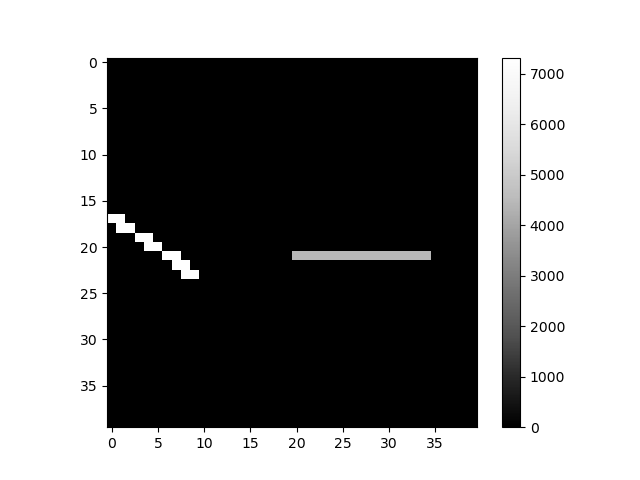
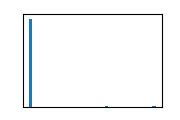

In [7]:
mean_intensity_mesh = cle.create_like(membranes)
mean_intensity_mesh = cle.touch_matrix_to_mesh(coords, mean_intensity_matrix, mean_intensity_mesh)
mean_intensity_mesh

We can also visualize this quantitative mesh on top of the original membrane image.

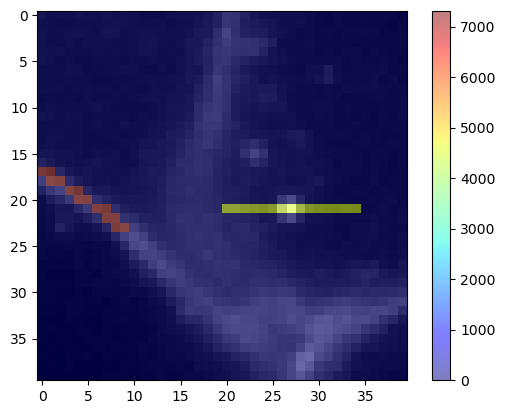

In [8]:
cle.imshow(membranes, continue_drawing=True)
cle.imshow(mean_intensity_mesh, alpha=0.5, colormap='jet', colorbar=True)

## Measuring the standard deviation intensity along a line
The same procedure also works for measuring the standard deviation along the lines.

In [9]:
stddev_intensity_matrix = cle.generate_standard_deviation_intensity_between_points_matrix(
                                membranes, coords, connection_matrix)
stddev_intensity_matrix

cl.OCLArray([[   0.     ,    0.     ,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,  572.79144,    0.     ,    0.     ],
       [   0.     ,  572.79144,    0.     ,    0.     ,    0.     ],
       [   0.     ,    0.     ,    0.     ,    0.     , 3758.1768 ],
       [   0.     ,    0.     ,    0.     , 3758.1772 ,    0.     ]],
      dtype=float32)

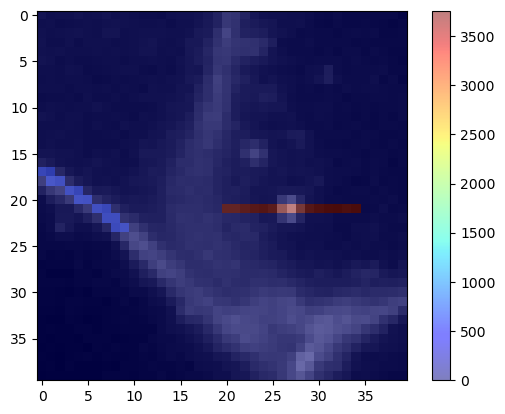

In [10]:
stddev_intensity_mesh = cle.create_like(membranes)
stddev_intensity_mesh = cle.touch_matrix_to_mesh(coords, stddev_intensity_matrix, stddev_intensity_mesh)

cle.imshow(membranes, continue_drawing=True)
cle.imshow(stddev_intensity_mesh, alpha=0.5, colormap='jet', colorbar=True)